In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as nfft

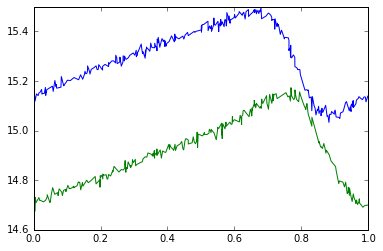

In [8]:
d16=np.genfromtxt('169975.dat_folded')
d51=np.genfromtxt('51886.dat_folded')
plt.plot(d16[:,0], d16[:,1])
plt.plot(d51[:,0], d51[:,1])

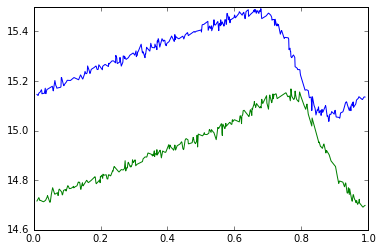

In [9]:
from scipy.interpolate import interp1d
x1 = np.linspace(0.01,0.99, 1024)
c51=interp1d(d51[:,0], d51[:,1])(x1)
c16=interp1d(d16[:,0], d16[:,1])(x1)
plt.plot(x1, c16)
plt.plot(x1, c51)

## Q1. Computing Cross-Correlation

We provide here a standardization function

In [10]:
def stand(x):
    return (x-np.mean(x))/np.std(x, ddof=0)

Write a function that takes two time seroes and uses the fourier method to calculate a cross-correlation function

In [11]:
def ccor(ts1, ts2):
    return nfft.ifft(nfft.fft(ts1) * np.conj(nfft.fft(ts2)))

We plot the correlation function. Where does it maximize?

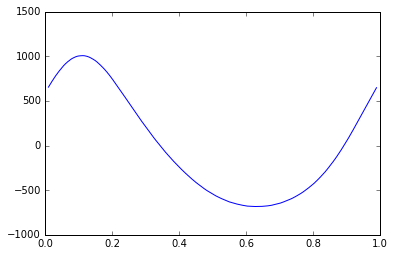

In [12]:
plt.plot(x1, ccor(stand(c51), stand(c16)))

## Q2. Dimensionality reduction with SAX

The idea behind SAX is to reduce dinensionality by capturing pieces of the curve and getting an average. So you are replacing the function by a set of steps. The next part is to encode the steps using some technique, here we will use binary strings. The [iSAX paper](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwi2y4u9p__LAhUD9R4KHYslCuAQFggdMAA&url=http%3A%2F%2Fwww.cs.ucr.edu%2F~eamonn%2FiSAX.pdf&usg=AFQjCNEhDE8xHlXBVfSkLUBo4UsVRHOyTw&sig2=dgG-oNiR2MAYcqyUWzCs3Q), which you should skim, at the very least, is the source of this explanation below

![](https://dl.dropboxusercontent.com/u/75194/saxrepr.png)



Our interpolated curves have 1024 points. Bin them in chunks of 32, so we have $w=32$ chunks, and use a cardinality $a=4$ to get a SAX(T, 32, 4). Represent both light curves this way. For bonus points solve it for a general cardinality a (you'll have to get the gaussian deivision from the table above).

Remember you are doing this on standardized time series. You can assume that the series has been interpolated to a power of 2 length. Write a function to do this below:

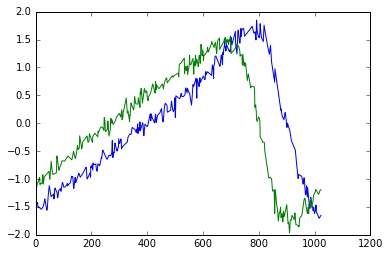

In [16]:
plt.plot(stand(c51))
plt.plot(stand(c16))

In [25]:
def representer4(series, w): # a will be 4
    splits = np.split(series, w)
    bins = [-2.0, -1.0, 0.0, 1.0, 2.0]
    inds = np.digitize(np.mean(splits, axis=1), bins)
    plt.plot(inds)

We apply the function

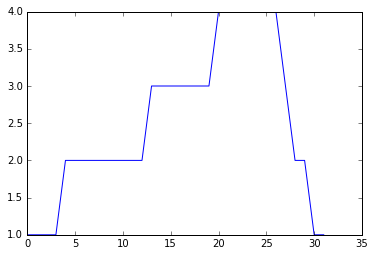

In [26]:
representer4(stand(c51), 32)

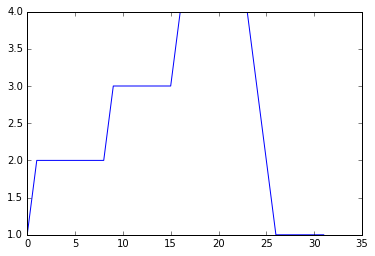

In [27]:
representer4(stand(c16), 32)

## Q3. VPTree (to read, not to submit)

Read the VPTree implementation is modified from https://github.com/huyng/algorithms/tree/master/vptree. Also see http://stevehanov.ca/blog/index.php?id=130 for a good explanation of the concepts (and C++ code if you are so inclined). You will use the VPtree to store some distances next week in an index so it is imperative that you read atleast one implementation.

